# 💻 Laboratory Task 5
### Data Augmentation on ECG: MIT-BIH Arrhythmia
**Submitted by:** Rekha R  
**Enrollment No.:** MT23AAI063

In [ ]:
#Load the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install wfdb
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
file_path = '/content/drive/MyDrive/MITBIH/100'

## Read the ECG Signal

Sampling frequency: 360 Hz | Signal length: 650000 samples


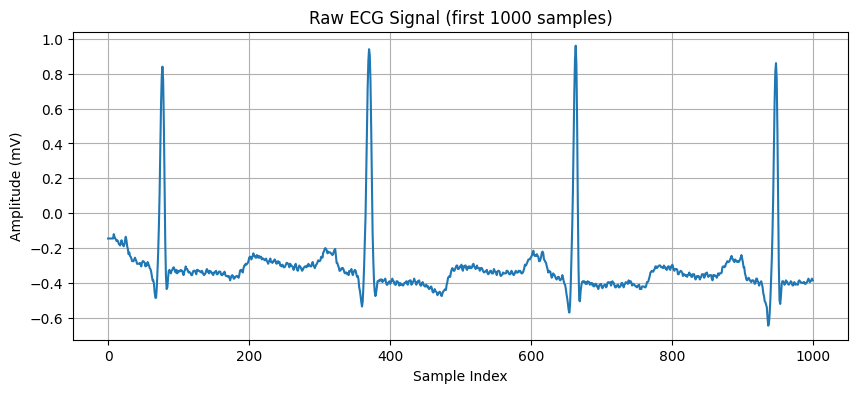

In [ ]:
record = wfdb.rdrecord(file_path)
# Extract signal and metadata
ecg_signal = record.p_signal[:, 0]  # Channel 0
fs = record.fs
print(f"Sampling frequency: {fs} Hz | Signal length: {len(ecg_signal)} samples")

# Plot raw signal
plt.figure(figsize=(10, 4))
plt.plot(ecg_signal[:1000])
plt.title("Raw ECG Signal (first 1000 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude (mV)")
plt.grid()
plt.show()


### Apply Augmentation Techniques

In [ ]:
# --- Add Noise ---
def add_noise(sig, noise_level=0.05):
    return sig + np.random.normal(0, noise_level, sig.shape)

# --- Time Warp (Resample) ---
def time_warp(sig, factor=1.2):
    return signal.resample(sig, int(len(sig)*factor))

# --- Crop ---
def crop(sig, size=1000):
    start = np.random.randint(0, len(sig)-size)
    return sig[start:start+size]

# --- Normalize ---
def normalize(sig):
    return (sig - np.min(sig)) / (np.max(sig) - np.min(sig))


In [ ]:
segment = ecg_signal[:1000]
noisy = add_noise(segment)
warped = time_warp(segment)
cropped = crop(ecg_signal)
normed = normalize(segment)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

## Time Warping

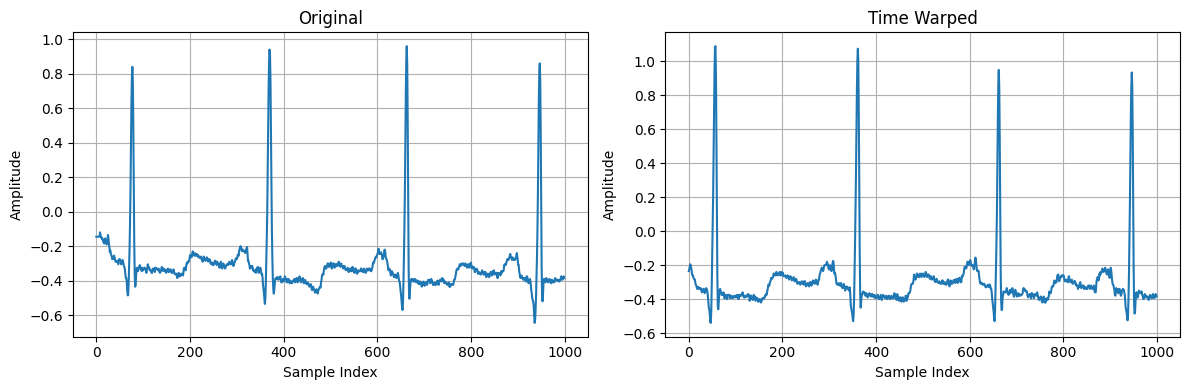

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
plt.plot(segment)
plt.title("Original")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

# Time Warped
plt.subplot(1, 2, 2)
plt.plot(cropped[:len(segment)])
plt.title("Time Warped")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

## Adding Noise

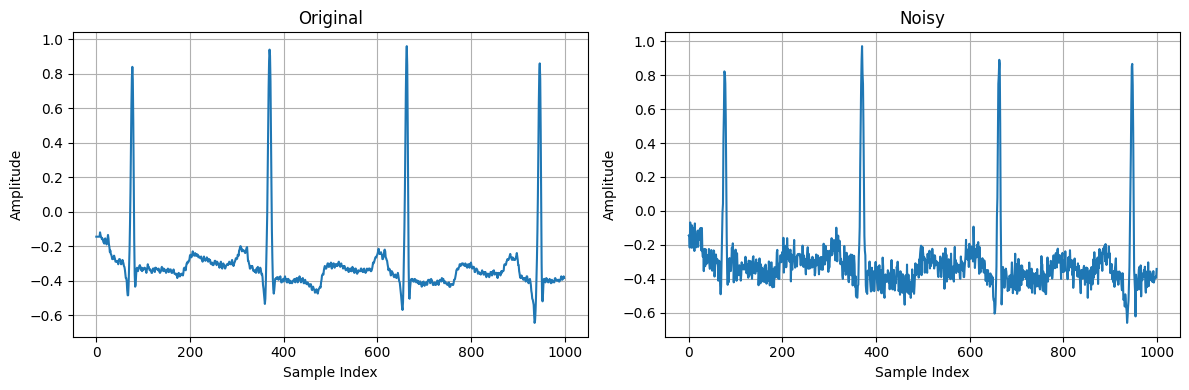

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
plt.plot(segment)
plt.title("Original")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

# Time Warped
plt.subplot(1, 2, 2)
plt.plot(noisy[:len(segment)])
plt.title("Noisy")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

## Random Cropping

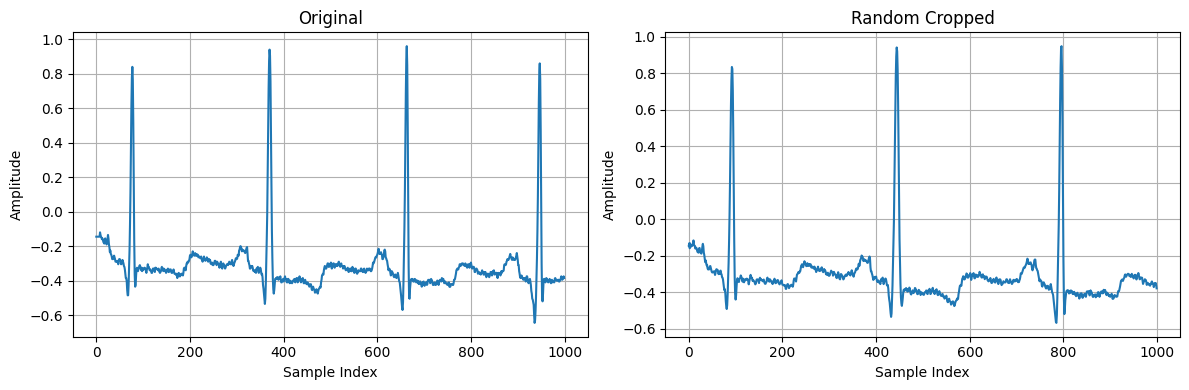

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
plt.plot(segment)
plt.title("Original")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

# Random Cropping
plt.subplot(1, 2, 2)
plt.plot(warped[:len(segment)])
plt.title("Random Cropped")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

## Scaling/Normalization

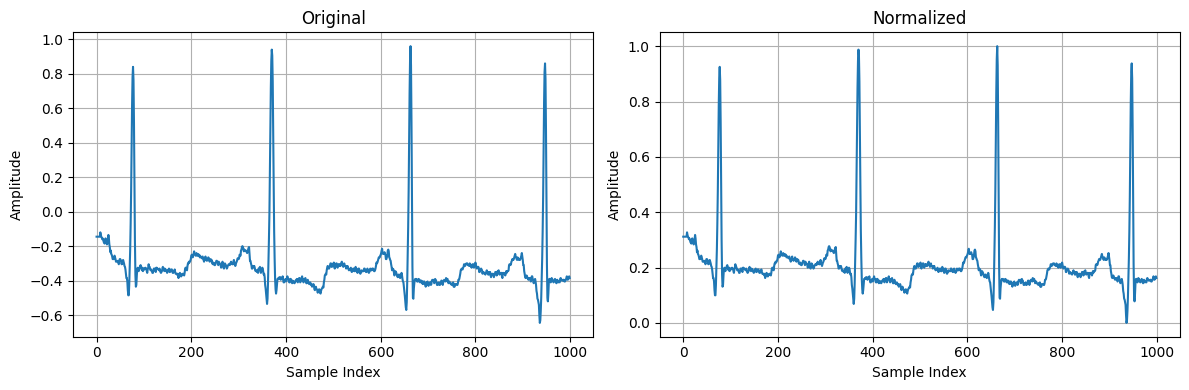

In [ ]:
plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
plt.plot(segment)
plt.title("Original")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

# Normalization
plt.subplot(1, 2, 2)
plt.plot(normed[:len(segment)])
plt.title("Normalized")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

##  Summary:

#### used real ECG data from the MIT-BIH Arrhythmia Database and applied several augmentation techniques:

#### Time Warping: Simulates changes in heart rate.


#### Noise Addition: Mimics sensor/electrical interference.


#### Cropping: Helps in training on partial/streaming data.


#### Normalization: Standardizes amplitude ranges.


#### These improve model robustness and generalization across patients and devices.